In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
# 1. 读取Excel文件的第二个工作表（"数据"表）
scaler = StandardScaler()
df = pd.read_excel('orgian.xlsx', sheet_name=1)  # sheet_name=1表示第二个工作表
df

,账期,户均流量,流量单价,零流量用户数（出账）,出账用户数（出账）,流量收入
0,202106,44.48,0.8838,2438373,3383781,3.716533e+07
1,202107,72.85,0.4975,2452705,3522668,3.877854e+07
2,202108,48.09,0.7335,2487524,3621338,3.999417e+07
3,202109,47.83,0.6993,2523553,3715930,3.988205e+07
4,202110,65.71,0.4871,2591404,3886349,4.144775e+07
5,202111,46.13,0.6353,2581808,3998408,4.151543e+07
6,202112,59.92,0.4409,2445802,4037385,4.204760e+07
7,202201,82.30,0.3555,2479172,4008428,4.474244e+07
8,202202,69.82,0.4070,2518545,4099621,4.492903e+07
9,202203,96.05,0.2970,2488889,4161080,4.770234e+07


In [22]:
# 2. 数据预处理
# 确保账期是日期格式（假设账期格式为YYYYMM）
df['账期'] = pd.to_datetime(df['账期'], format='%Y%m')
df.set_index('账期', inplace=True)
df.sort_index(inplace=True)  # 确保按时间排序

In [23]:
# 3. 提取流量收入数据（黄色部分）
revenue = df['流量收入']
revenue

账期
2021-06-01    3.716533e+07
2021-07-01    3.877854e+07
2021-08-01    3.999417e+07
2021-09-01    3.988205e+07
2021-10-01    4.144775e+07
2021-11-01    4.151543e+07
2021-12-01    4.204760e+07
2022-01-01    4.474244e+07
2022-02-01    4.492903e+07
2022-03-01    4.770234e+07
2022-04-01    4.682974e+07
2022-05-01    4.864242e+07
2022-06-01    5.057496e+07
2022-07-01    5.302656e+07
2022-08-01    5.500364e+07
2022-09-01    5.636365e+07
2022-10-01    5.758039e+07
2022-11-01    5.897818e+07
2022-12-01    6.411024e+07
2023-01-01    6.743425e+07
2023-02-01    7.032734e+07
2023-03-01    7.526969e+07
2023-04-01    7.940701e+07
2023-05-01    8.689291e+07
2023-06-01    7.920991e+07
2023-07-01    8.190868e+07
2023-08-01    7.973485e+07
2023-09-01    7.732112e+07
2023-10-01    7.821680e+07
2023-11-01    8.409197e+07
2023-12-01    8.683596e+07
2024-01-01    8.915763e+07
2024-02-01    8.353072e+07
Name: 流量收入, dtype: float64

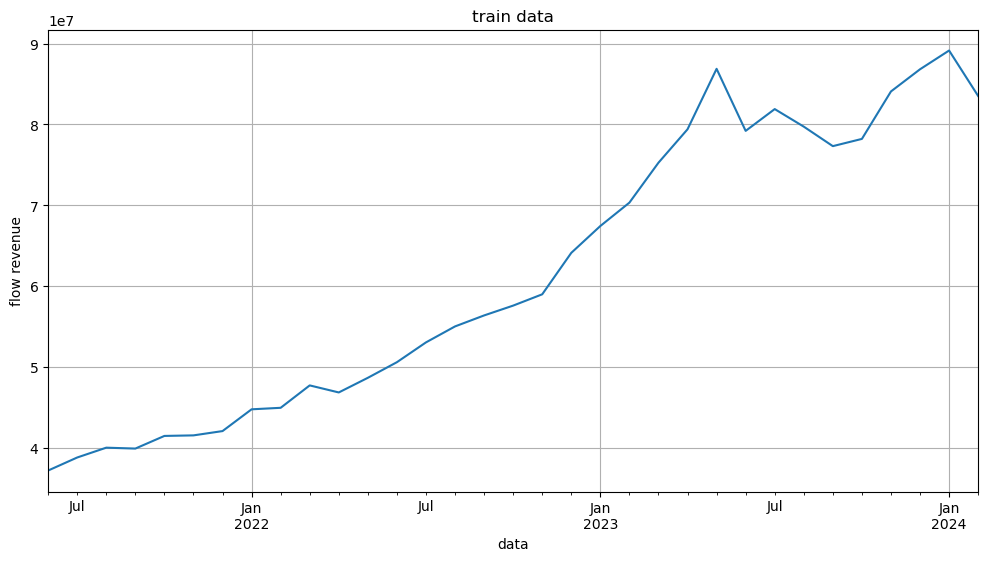

In [24]:
# 4. 可视化原始数据
plt.figure(figsize=(12, 6))
revenue.plot(title='train data', grid=True)
plt.ylabel('flow revenue')
plt.xlabel('data')
plt.show()

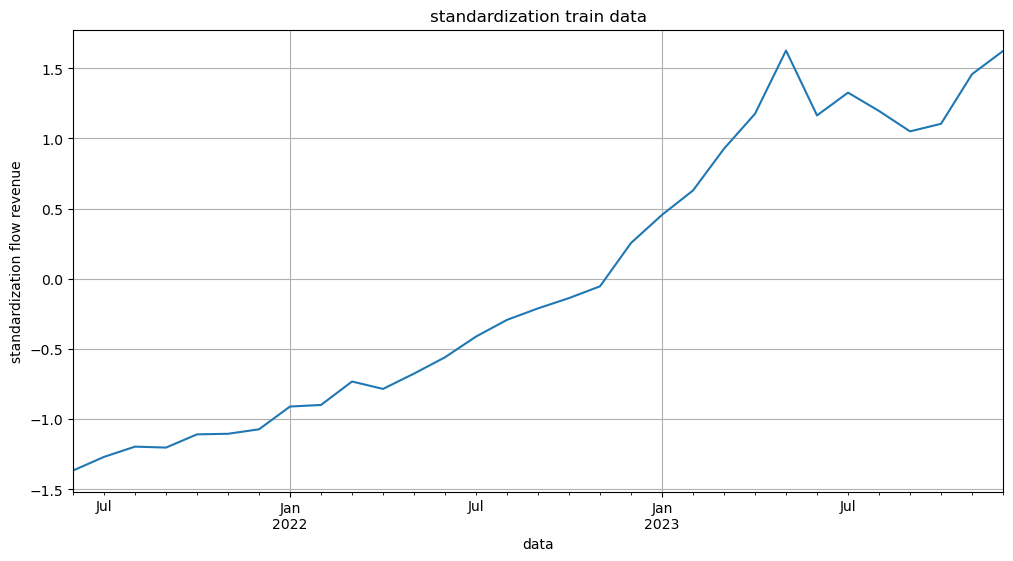

账期
2021-06-01   -1.366068
2021-07-01   -1.269006
2021-08-01   -1.195864
2021-09-01   -1.202610
2021-10-01   -1.108407
2021-11-01   -1.104334
2021-12-01   -1.072315
2022-01-01   -0.910174
2022-02-01   -0.898948
2022-03-01   -0.732085
2022-04-01   -0.784587
2022-05-01   -0.675523
2022-06-01   -0.559248
2022-07-01   -0.411741
2022-08-01   -0.292786
2022-09-01   -0.210958
2022-10-01   -0.137750
2022-11-01   -0.053648
2022-12-01    0.255133
2023-01-01    0.455130
2023-02-01    0.629199
2023-03-01    0.926567
2023-04-01    1.175498
2023-05-01    1.625904
2023-06-01    1.163639
2023-07-01    1.326017
2023-08-01    1.195223
2023-09-01    1.049996
2023-10-01    1.103887
2023-11-01    1.457379
2023-12-01    1.622478
dtype: float64

In [25]:
# 5. 划分训练集和测试集（使用2024年1-2月作为测试集）
train = revenue.loc[:'2023-12']
test = revenue.loc['2024-01':]
# 标准化后的建模流程
scaler = StandardScaler()
train_scaled_values = scaler.fit_transform(train.values.reshape(-1, 1)).flatten()
train_scaled=pd.Series(train_scaled_values,index=train.index)
plt.figure(figsize=(12,6))
train_scaled.plot(title='standardization train data',grid=True)
plt.ylabel('standardization flow revenue')
plt.xlabel('data')
plt.show()
train_scaled

In [34]:
# 6. 建立SARIMA模型并拟合
# 参数说明：(p,d,q)为非季节性部分，(P,D,Q,s)为季节性部分
model = SARIMAX(train_scaled, 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 12))
results = model.fit()

E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
E:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
E:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARM

In [35]:
# 7. 模型诊断
print(results.summary())
results

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   31
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   2.118
Date:                            Fri, 04 Jul 2025   AIC                              5.763
Time:                                    15:48:13   BIC                             10.215
Sample:                                06-01-2021   HQIC                             6.377
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2225      7.173      0.031      0.975     -13.836      14.281
ma.L1         -0.1675      7.417   

In [28]:
forecast = results.get_forecast(steps=12)
forecast_mean_scaled = forecast.predicted_mean
conf_int_scaled = forecast.conf_int()
forecast_mean = pd.Series(
    scaler.inverse_transform(forecast_mean_scaled.values.reshape(-1, 1)).flatten(),
    index=forecast_mean_scaled.index
)
forecast_mean

2024-01-01    8.983235e+07
2024-02-01    9.098958e+07
2024-03-01    9.453040e+07
2024-04-01    9.542206e+07
2024-05-01    9.923031e+07
2024-06-01    9.776883e+07
2024-07-01    1.000618e+08
2024-08-01    1.010518e+08
2024-09-01    1.013226e+08
2024-10-01    1.025633e+08
2024-11-01    1.044966e+08
2024-12-01    1.080371e+08
Freq: MS, dtype: float64

In [29]:

# 逆标准化预测结果

conf_int_lower = scaler.inverse_transform(conf_int_scaled.iloc[:, 0].values.reshape(-1, 1)).flatten()
conf_int_upper = scaler.inverse_transform(conf_int_scaled.iloc[:, 1].values.reshape(-1, 1)).flatten()


# 8. 预测2024年1-12月数据
#forecast_steps = 12
#forecast = results.get_forecast(steps=forecast_steps)
#forecast_mean = forecast.predicted_mean
#conf_int = forecast.conf_int()

In [30]:
# 9. 评估模型（在测试集上）
predictions_scaled = forecast_mean_scaled.loc['2024-01':'2024-02']
predictions = scaler.inverse_transform(predictions_scaled.values.reshape(-1, 1)).flatten()
mae = mean_absolute_error(test, predictions)
print(f"测试集MAE(平均绝对误差): {mae:.2f}")

测试集MAE(平均绝对误差): 4066788.50


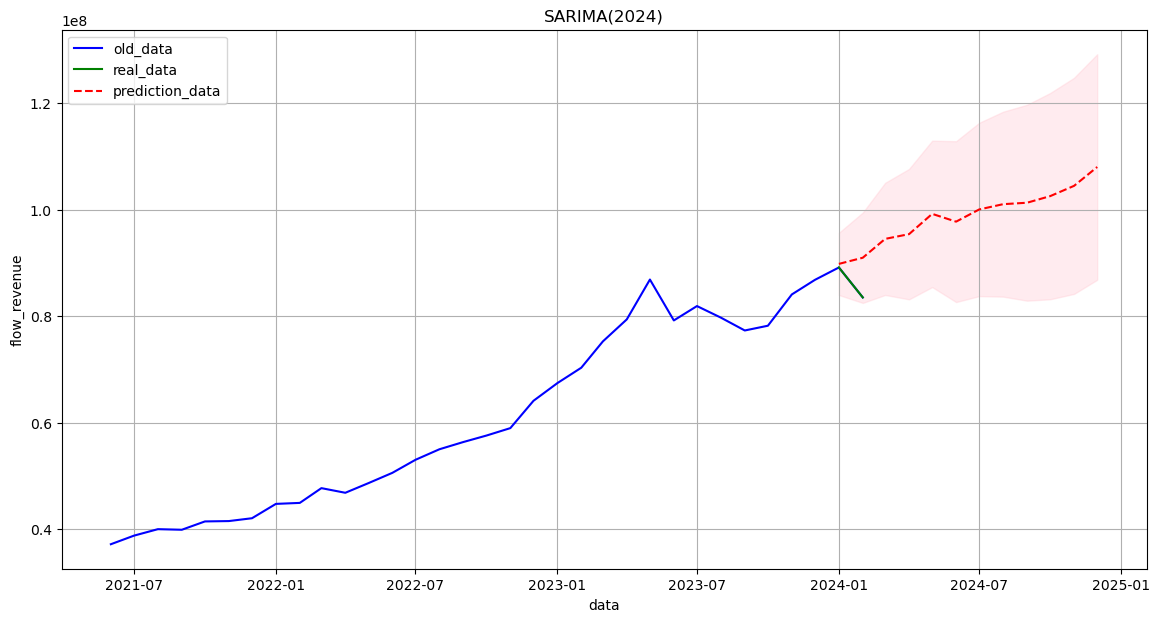

账期
2021-06-01    3.716533e+07
2021-07-01    3.877854e+07
2021-08-01    3.999417e+07
2021-09-01    3.988205e+07
2021-10-01    4.144775e+07
2021-11-01    4.151543e+07
2021-12-01    4.204760e+07
2022-01-01    4.474244e+07
2022-02-01    4.492903e+07
2022-03-01    4.770234e+07
2022-04-01    4.682974e+07
2022-05-01    4.864242e+07
2022-06-01    5.057496e+07
2022-07-01    5.302656e+07
2022-08-01    5.500364e+07
2022-09-01    5.636365e+07
2022-10-01    5.758039e+07
2022-11-01    5.897818e+07
2022-12-01    6.411024e+07
2023-01-01    6.743425e+07
2023-02-01    7.032734e+07
2023-03-01    7.526969e+07
2023-04-01    7.940701e+07
2023-05-01    8.689291e+07
2023-06-01    7.920991e+07
2023-07-01    8.190868e+07
2023-08-01    7.973485e+07
2023-09-01    7.732112e+07
2023-10-01    7.821680e+07
2023-11-01    8.409197e+07
2023-12-01    8.683596e+07
Name: 流量收入, dtype: float64
账期
2024-01-01    8.915763e+07
2024-02-01    8.353072e+07
Name: 流量收入, dtype: float64
2024-01-01    8.983235e+07
2024-02-01    9.098958

In [32]:
#10. 可视化预测结果
plt.figure(figsize=(14, 7))
plt.plot(revenue.index, revenue, label='old_data', color='blue')
plt.plot(test.index, test, label='real_data', color='green')
plt.plot(forecast_mean.index, forecast_mean, label='prediction_data', color='red', linestyle='--')
plt.fill_between(forecast_mean.index,
                conf_int_lower,
                conf_int_upper, 
                color='pink', alpha=0.3)
plt.title('SARIMA(2024)')
plt.xlabel('data')
plt.ylabel('flow_revenue')
plt.legend()
plt.grid(True)
plt.show()
# # 10. 可视化（自动使用原始量纲）
# plt.figure(figsize=(14, 7))
# plt.plot(train.index, train, label='历史数据', color='blue')
# plt.plot(test.index, test, label='实际值', color='green')
# plt.plot(forecast_mean.index, forecast_mean, label='预测值', color='red', linestyle='--')
# plt.fill_between(forecast_mean.index,
#                 conf_int_lower,
#                 conf_int_upper, 
#                 color='pink', alpha=0.3)
# plt.title('流量收入预测 (逆标准化后)')
# plt.ylabel('流量收入（元）')  # 注意单位恢复
print(train)
print(test)
print(forecast_mean)

In [33]:
# 修改第11步输出（使用逆标准化后的数据）
forecast_df = pd.DataFrame({
    '预测日期': forecast_mean.index,
    '预测流量收入': forecast_mean.values,
    '下限(95%置信区间)': conf_int_lower,
    '上限(95%置信区间)': conf_int_upper
})
print("\n2024年流量收入预测结果:")
print(forecast_df.round(2))


2024年流量收入预测结果:
         预测日期        预测流量收入  下限(95%置信区间)   上限(95%置信区间)
0  2024-01-01  8.983235e+07  83990249.58  9.567445e+07
1  2024-02-01  9.098958e+07  82497388.39  9.948178e+07
2  2024-03-01  9.453040e+07  83995170.47  1.050656e+08
3  2024-04-01  9.542206e+07  83172016.13  1.076721e+08
4  2024-05-01  9.923031e+07  85476048.40  1.129846e+08
5  2024-06-01  9.776883e+07  82659367.17  1.128783e+08
6  2024-07-01  1.000618e+08  83781268.48  1.163424e+08
7  2024-08-01  1.010518e+08  83678872.48  1.184247e+08
8  2024-09-01  1.013226e+08  82921999.49  1.197231e+08
9  2024-10-01  1.025633e+08  83189516.64  1.219370e+08
10 2024-11-01  1.044966e+08  84196263.82  1.247970e+08
11 2024-12-01  1.080371e+08  86850599.06  1.292235e+08


In [73]:
forecast_mean

2024-01-01    9.012204e+07
2024-02-01    9.299598e+07
2024-03-01    9.792868e+07
2024-04-01    1.020611e+08
2024-05-01    1.095446e+08
2024-06-01    1.018603e+08
2024-07-01    1.045585e+08
2024-08-01    1.023843e+08
2024-09-01    9.997045e+07
2024-10-01    1.008661e+08
2024-11-01    1.067412e+08
2024-12-01    1.094852e+08
Freq: MS, dtype: float64